In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
color_dict = {1:'red', 2:'blue', 3:'limegreen', 4:'limegreen'}

In [23]:
df = pd.read_csv('neuron_shape_data/test_neuron.txt', sep = ' ', header=None, skipinitialspace = True)
df.columns = ['comp_id','type','x','y','z','radius','parent_id']
df

,comp_id,type,x,y,z,radius,parent_id
0,1,1,0.00,0.00,0.00,5.165,-1
1,2,1,-2.29,-4.49,1.08,5.165,1
2,3,1,2.29,4.48,-1.08,5.165,1
3,4,2,-3.91,0.70,-2.40,0.120,1
4,5,2,-1.67,-1.67,-3.15,0.120,4
...,...,...,...,...,...,...,...
1190,1191,3,13.96,184.84,26.35,0.240,1190
1191,1192,3,14.93,185.06,27.75,0.240,1191
1192,1193,3,18.04,184.63,29.41,0.240,1192
1193,1194,3,20.26,183.99,31.43,0.240,1193


In [24]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['comp_id'], nodetype = row['type'])
    
for index, row in df.iterrows():
    if index > 0:
        G.add_edge(row['comp_id'], row['parent_id'])
        
xy_coordinates = list(df[['x', 'y']].itertuples(index=False, name=None))
xy_coordinates = {row[0]: tuple(row[1:])[0] for row in zip(df['comp_id'], xy_coordinates)}

node_colors = [color_dict[t] for t in df['type']]

node_radius = np.array([row['radius'] for index, row in df.iterrows()])
node_radius = node_radius*(5/np.min(node_radius))

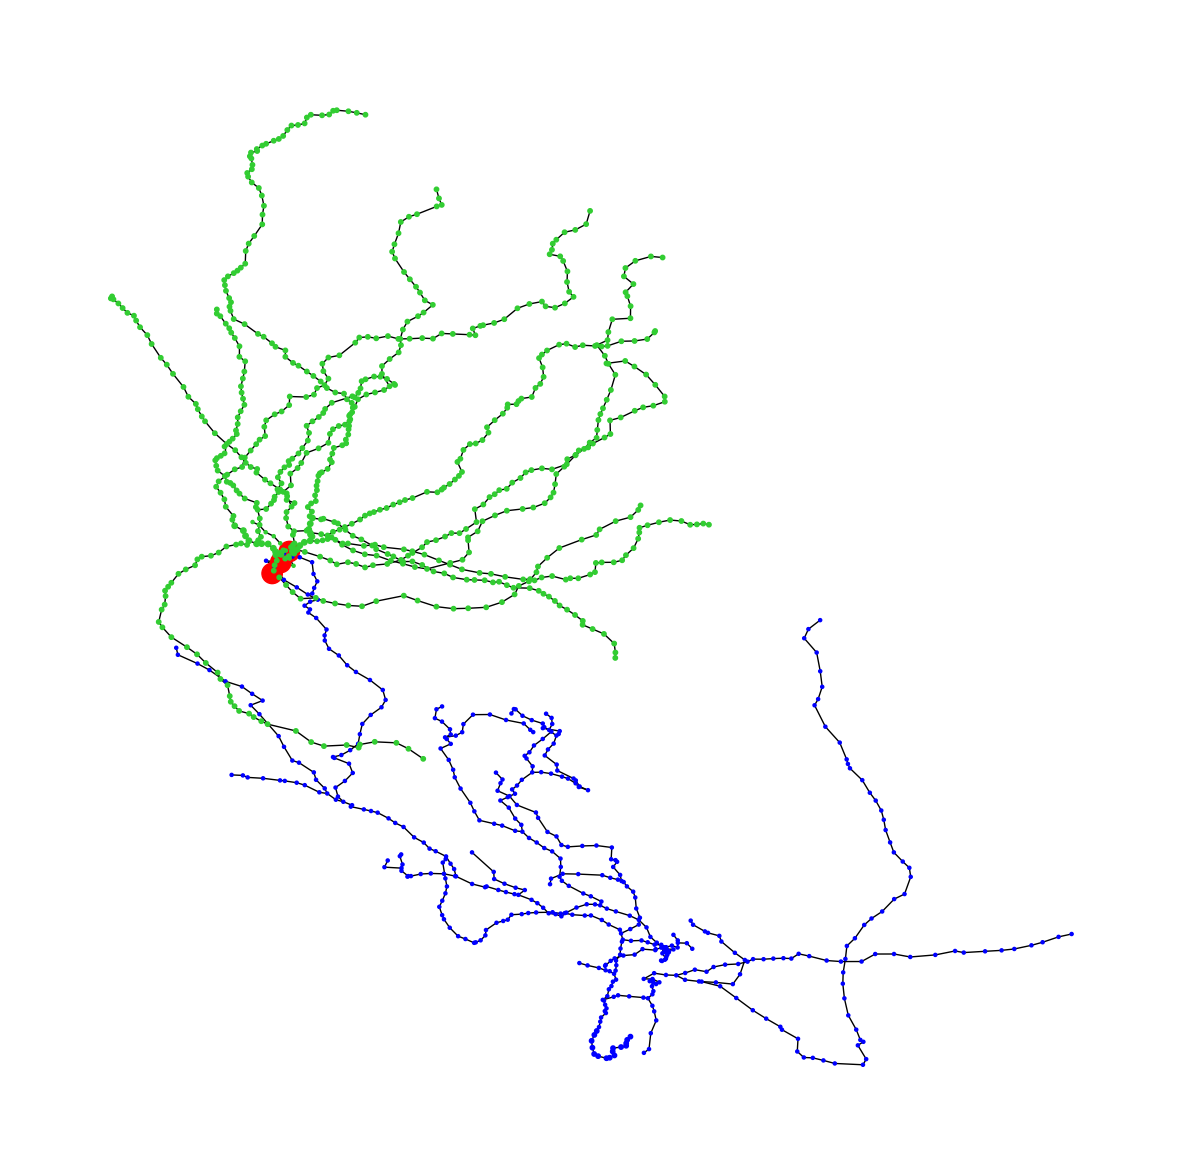

In [27]:
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos=xy_coordinates, node_size=node_radius, ax=ax, node_color = node_colors)
plt.show()